<img src='https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/tools/frameworks/-/raw/main/img/Standard_banner.png' align='right' width='100%'/>

<a href="../../Index.ipynb" target="_blank"><< Index</a>
<br>
<a href="../Quality_and_cloud/Thermal_image_interpretation_SST_estimation.ipynb"><< Thermal image interpretation and estimation of sea surface temperature
</a>

<font color="#138D75">**Copernicus Marine Training Service**</font> <br>
**Copyright:** 2025 European Union <br>
**License:** MIT <br>
**Authors:** Ben Loveday (EUMETSAT/Innoflair UG), Gary Corlett (EUMETSAT), Hayley Evers-King (EUMETSAT)

<html>
   <div style="float:left"><p>&emsp;</p></div>
   <div style="float:left"><a href="https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/applications/sea-surface-temperature-applications"><img src="https://img.shields.io/badge/open-EUMETLAB-E67E22.svg"></a></div>
   <div style="float:left"><p>&emsp;</p></div>
   <div style="float:left"><a href="https://user.eumetsat.int/data/themes/marine"><img src="https://img.shields.io/badge/open-USER PORTAL-154360.svg"></a></div>
   <div style="float:left"><p>&emsp;</p></div>
   <div style="float:left"><a href="https://jupyterhub.prod.wekeo2.eu/hub/"><img src="https://img.shields.io/badge/launch-WEKEO-1a4696.svg"></a></div>
   <div style="float:left"><p>&emsp;</p></div>
   <div style="float:left"><a href="https://code.insula.destine.eu/hub/"><img src="https://img.shields.io/badge/launch-DestinE-f43fd3.svg"></a></div></div>
</html>

<div class="alert alert-block alert-success">
<h3>Sea surface temperature applications</h3></div>

<div class="alert alert-block alert-warning">
    
<b>PREREQUISITES </b>

This notebook has the following prerequisites:
- A **<a href="https://data.marine.copernicus.eu/register" target="_blank">Copernicus Marine Service (CMEMS) account</a>** to download data from the CMEMS Data Store

There are no prerequisite notebooks for this module.

<b>WHERE TO RUN THIS NOTEBOOK?</b>

This notebook can be run on a local machine or on a remote cloud system, and is tested on WEkEO and the DestinE Insula Code services. You can use the buttons at the top of the notebook to access these platforms, but you will need a free account on whichever service you choose. Full instructions for how to set up this notebook is provided in the README. Running on Binder is not possible due to the size of dependencies.

</div>
<hr>

# Selecting, exploring and validating sea surface temperature products
<font color="#138D75">**Devloped by EUMETSAT in support of the 2025 ESA OTC course**</font>

### Data used

| Dataset | EUMETSAT collection ID| EUMETSAT collection<br>description | Copernicus Marine Data Store product ID | Copernicus Marine product description | WEkEO dataset ID | WEkEO description |
|:--------------------:|:-----------------------:|:-------------:|:-----------------:|:-----------------:|:-----------------:|:-----------------:|
| Global OSTIA level 4 SST | - | - | SST_GLO_SST_L4_NRT_OBSERVATIONS_010_001 | <a href="https://data.marine.copernicus.eu/product/SST_GLO_SST_L4_NRT_OBSERVATIONS_010_001/description" target="_blank">Description</a> | EO:MO:DAT:SST_GLO_SST_L4_NRT_OBSERVATIONS_010_001 | <a href="https://www.wekeo.eu/data?view=dataset&dataset=EO%3AMO%3ADAT%3ASST_GLO_SST_L4_NRT_OBSERVATIONS_010_001" target="_blank">Description</a> |
| Global ODYSSEA level 3 SST | - | - | SST_GLO_SST_L3S_NRT_OBSERVATIONS_010_010 | <a href="https://data.marine.copernicus.eu/product/SST_GLO_SST_L3S_NRT_OBSERVATIONS_010_010/description" target="_blank">Description</a> | EO:MO:DAT:SST_GLO_SST_L3S_NRT_OBSERVATIONS_010_010 | <a href="https://www.wekeo.eu/data?view=dataset&dataset=EO%3AMO%3ADAT%3ASST_GLO_SST_L3S_NRT_OBSERVATIONS_010_010" target="_blank">Description</a> |
| Global physics analysis and forecast SST | - | - | GLOBAL_ANALYSISFORECAST_PHY_001_024 | <a href="https://data.marine.copernicus.eu/product/GLOBAL_ANALYSISFORECAST_PHY_001_024/description" target="_blank">Description</a> | EO:MO:DAT:GLOBAL_ANALYSISFORECAST_PHY_001_024 | <a href="https://www.wekeo.eu/data?view=dataset&dataset=EO%3AMO%3ADAT%3AGLOBAL_ANALYSISFORECAST_PHY_001_024" target="_blank">Description</a> |
| Mediterranean Sea hourly subskin SST | - | - | SST_MED_PHY_SUBSKIN_L4_NRT_010_036 | <a href="https://data.marine.copernicus.eu/product/SST_MED_PHY_SUBSKIN_L4_NRT_010_036/description" target="_blank">Description</a> | EO:MO:DAT:SST_MED_PHY_SUBSKIN_L4_NRT_010_036 | <a href="https://www.wekeo.eu/data?view=dataset&dataset=EO%3AMO%3ADAT%3ASST_MED_PHY_SUBSKIN_L4_NRT_010_036" target="_blank">Description</a> |

### Learning outcomes

At the end of this notebook you will;
* Recall some of the single- and multi-sensor SST products that are available.
* Understand how to select the best SST product for your application and validate it.

### Outline

There are a great many different sea surface temperature (SST) products to choose from, and deciding which one is right for you needs can be challenging. There are various factors that you should consider when selecting a data set, and below we have listed some of the major points to consider;

1. SST can be retrieved from space, derived from in situ observations or extracted from numerical models. Here, we will focus on the former, but it is important to remember that *in situ* data is required to validate remotely sensed products, and both sets of observations are often assimmilated into numerical models to both constrain them and support dynamical downscaling to higher resolutions.

2. Spatial resolution and coverage. Do you need SST data at the highest resolution, as provided by single sensor products at level 2, or do you need the global coverage that tends to be provided by multi-sensor, lower-resolution, products at level 3? Can you accommodate gaps in your analysis or do you need level 4 products?

3. Temporal resolution and coverage. Do you need daily data, twice-daily data (for diurnal cycle assessment) or will monthly data suffice? Do you intend to calculate anomlies, and if so, how long a time series do you need? If you are looking at trends, you may need a climate data record, which mandates a length of at least 30 years. Or are you rather interested in the hear-and-now that single sensor near-real time data can give you?

4. At what depth do you want your measurements? This may seem a strange question when considering the idea of sea <b>SURFACE</b>, but in practice SST is retrieved, and distributed, at many depths, depending on the nature of the sensor used and the processing applied (Figure 1)

<center><figure>
  <img src='https://www.ghrsst.org/wp-content/uploads/2021/04/newerSSTdef.gif' align='centre' width='40%'/>
  <img src="../../img/SST_diurnal.png" width='52.5%'/>
  <figcaption>Figure 1: GHRSST SST definitions (left) and a schematic representation of the evolution of their diurnal variability over the course of a few days (right).</figcaption>
</figure></center>

Bearing these considerations in mind, below we will take a look at some SST products, comparing them with *in situ* data taken from an example cruise with a view to lightly "validating" them for our purposes. The four products we will select are highlighted in the "data used" table at the top of this page. They range in type, depth, coverage, and spatial and temporal resolution. We will discuss them throughout the notebook.

Before we begin you should note that this notebook can be run locally, or on a remote cloud system, by cloning the **<a href="https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/applications/sea-surface-temperature-applications" target="_blank">sea-surface-temperature-applications</a>** repository. The **<a href="https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/applications/sea-surface-temperature-applications/-/blob/main/README.md" target="_blank">README</a>** file will fully describe how to create an appropriate Python environment to run this code.

**Note: to download the required CMEMS SST data, you will need to register for a <a href="https://data.marine.copernicus.eu/register" target="_blank">Copernicus Marine Service (CMEMS) account</a> account. Please see the prerequisites for more information on how to do this**.

<div class="alert alert-info" role="alert">

## <a id='TOC_TOP'></a>Contents

</div>
    
1. [Step 1: Setting up our analysis](#section1)
1. [------: A quick preamble on functions](#section0)
1. [Step 2: Loading and plotting our cruise tracks](#section2)
1. [Step 3: Acquiring level 4 SST data from the Copernicus Marine Service](#section3)
1. [Step 4: Viewing our SST "data cube"](#section4)
1. [Step 5: Interpolating SST data along our track](#section5)
1. [Step 6: Validating our data sets](#section6)
1. [Step 7: Conclusions](#section7)

<hr>

<div class="alert alert-info" role="alert">

## <a id='section1'></a>Step 1: Setting up our analysis
[Back to top](#TOC_TOP)

</div>

We begin by importing all of the libraries that we need to run this notebook. If you have built your python using the environment file provided in this repository, then you should have everything you need. For more information on building environment, please see the repository **<a href="https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/applications/sea-surface-temperature-applications/-/blob/main/README.md" target="_blank">README</a>**.

In [1]:
import os                               # a library that allows us access to basic operating system commands
import matplotlib.pyplot as plt         # a library that support plotting
import datetime                         # a libary that allows us to work with dates and times
import numpy as np                      # a library that lets us work with arrays; we import this with a new name "np"
from pathlib import Path                # a library that helps construct system path objects
import copernicusmarine                 # a library to help us access CMEMS data
import cartopy                          # a library that support mapping
from scipy.interpolate import interpn   # a library that supports irregular grid interpolation
import pandas as pd                     # a library the support times series management
import xarray as xr                     # a library that supports the use of multi-dimensional arrays in Python
from xcube.webapi.viewer import Viewer  # a library that provides the Xcube viewer
import warnings                         # a library that helps us handle warnings

# turn off any script warnings
warnings.filterwarnings('ignore')


# set Xcube server if running on WEkEO
if "WEKEO_DATABROKER_URL" in os.environ:
    os.environ["XCUBE_JUPYTER_LAB_URL"] = f"https://jupyterhub.prod.wekeo2.eu/user/{os.environ['JUPYTERHUB_USER']}/"

Lets set a couple of quick parameters that help us with handling data. `pad` will set a buffer around our cruise data when requesting SST data, and, for the sake of convenience, `cruise_point_min`, `cruise_point_max` and `cruise_subsample` will subsample our cruise data, which is at very high temporal resolution.

In [2]:
pad = 1
cruise_point_min = 0
cruise_point_max = -1
cruise_subsample = 200

<div class="alert alert-warning" role="alert">

## <a id='section0'></a>A quick preamble on functions
[Back to top](#TOC_TOP)

</div>

Before we start the notebook proper, we will define a quick function that we will use throughout. The function is quite simple and just adds embellishments (gridlines, labels etc) to plots.

In [3]:
def embellish_plot(m):
    """Quick function to embellish SLSTR plots with gridlines and labels

    Args:
        m (axis): the axis to plot into
    Returns:
        None
    """
    # add some map embellishments
    m.add_feature(cartopy.feature.NaturalEarthFeature('physical', 'land', '10m', edgecolor='k', facecolor='#546d51', linewidth=0.5), zorder=8)
    g1 = m.gridlines(draw_labels = True, linestyle='--', zorder=10)
    g1.top_labels = g1.right_labels = False
    g1.xlabel_style = g1.ylabel_style = {'color': 'gray'}

<div class="alert alert-info" role="alert">

## <a id='section2'></a>Step 2: Loading and plotting our cruise track
[Back to top](#TOC_TOP)

</div>

<figure>
  <img src='../../img/Cruise_track.png' align='right' width='55%'/>
</figure>

Lets start by taking a look at the proposed cruise track for the Statsraad Lehmkuhl for the ESA OTC 2025 course, as shown on the right. Here, the markers show us the way points logged for the cruise, and not all the actual sampling positions. Of course, as this cruise is scheduled in the future we don't yet have any data to compare with SST products, so we will use another cruise that covers some of the same area as an example.

For our test cruise, we will use the first leg AWI Polerstern expedition <a href="https://epic.awi.de/id/eprint/57671/1/Expeditionprogramme_PS135_1_PS135_2.pdf">PS135</a> as it sampled northeastern Atlantic quite recently, in 2023, and at roughly the same time of year as our cruise (March/April). The cruise data is also freely available through <a href="https://doi.pangaea.de/10.1594/PANGAEA.964295">Pangaea</a>, and incudes the underway data from a thermosalinograph running at a constant 11 m. We will use the temperature data from this instrument as the *in situ* data set for our analysis, but you could choose any other cruise to do the same analysis, provided you correctly map the data when you ingest it (more on this below).

Lets read in the data from the cruise track, as stored in our "tracks" directory, using the `pandas` package (which we imported under the alias "pd"). Our specific cruise data is stored in the "PS135_2_surf_oce.txt" file, which includes a 29-line header description followed by a series of tab-separated columns containing our data. We need to specify the number of header rows rto skip them when reading the file, as well as the delimiter (in this case tab, or '\t'). 

We will also subsample the output in time using our `cruise_subsample` parameter we set above.

In [4]:
df = pd.read_csv(os.path.join(os.getcwd(), "tracks", "PS135_2_surf_oce.txt"), header=29, delimiter='\t')
df = df[cruise_point_min:cruise_point_max:cruise_subsample]

Lets check our data out...

In [5]:
df

,Date/Time,Latitude,Longitude,Depth water [m],Temp [°C],QF water temp,Cond [mS/cm],T intern [°C],Sal,QF sal
0,2023-03-28T18:01:00,16.887517,-25.009311,11.0,23.684,2,53.099,23.719,36.035,2
200,2023-03-28T21:21:00,16.948758,-24.980284,11.0,23.881,1,53.319,23.941,36.022,1
400,2023-03-29T00:41:00,17.352052,-24.536896,11.0,23.341,1,52.961,23.350,36.231,1
600,2023-03-29T04:01:00,17.583502,-24.282108,11.0,23.490,1,53.180,23.529,36.252,1
800,2023-03-29T07:21:00,17.583379,-24.283035,11.0,23.467,1,53.166,23.500,36.265,1
...,...,...,...,...,...,...,...,...,...,...
17400,2023-04-09T20:03:00,51.014823,1.554941,11.0,9.548,1,37.597,9.568,34.908,1
17600,2023-04-09T23:23:00,51.418893,2.145017,11.0,9.425,1,37.554,9.455,34.973,1
17800,2023-04-10T02:43:00,51.893681,2.748989,11.0,9.020,1,36.977,9.051,34.767,1
18000,2023-04-10T06:03:00,52.336875,3.409363,11.0,8.534,1,36.256,8.563,34.485,1


As we can see, we have the spatial and temporal data for the tracks, as well as the "Temp [°C]" data we need to extract for comparison. The time record provided by `pandas` is a little hard to work with, we'll quickly define our own for later use.

In [6]:
cruise_times = [datetime.datetime.strptime(i, "%Y-%m-%dT%H:%M:%S") for i in df["Date/Time"]]

Lets take a look at our cruise track, plotting the track and the associated temperature signal from the thermosalinograph.

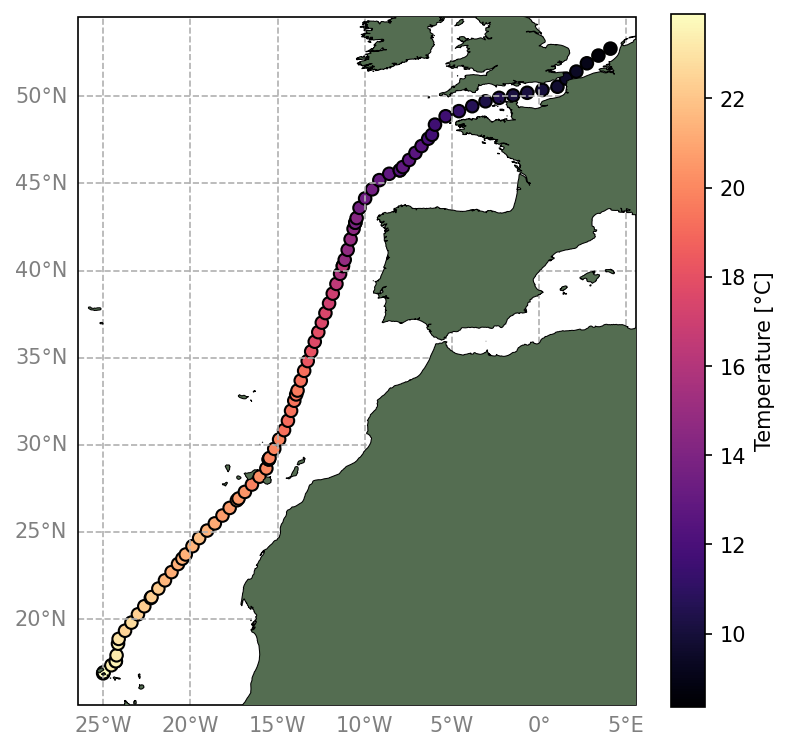

In [7]:
# set up our figure
fig, m = plt.subplots(1, 1, figsize=(6, 6), dpi=150, subplot_kw={"projection": cartopy.crs.PlateCarree()})

# plot cruise track and data points
p2, = m.plot(df["Longitude"], df["Latitude"], zorder=1, color='0.5', transform = cartopy.crs.PlateCarree())
p3 = m.scatter(df["Longitude"], df["Latitude"], c=df["Temp [°C]"], zorder=2, transform = cartopy.crs.PlateCarree(), cmap="magma", edgecolor='k')

# plot colorbar
plt.colorbar(p3, label="Temperature [°C]")

# add some map embellishments
embellish_plot(m)

As expected, we can see the evolution of the tempererature with latitude, getting colder as we head North (the ship ends it voyage in Bremerhaven, Germany). As we have subsampled the data, we can't see much mesoscale variability, but we can zoom in on certain sections to see more features.

<div class="alert alert-block alert-warning">

### Challenge:

Try playing with the plotting settings subset the data in different ways to look at specific regions more closely. e.g. try:
* cruise_point_min = 5000, cruise_point_max = 6500, subsample = 10 to look at the Canary Islands, or
* cruise_point_min = 12000, cruise_point_max = 14000, subsample = 10 to look at the north of the Bay of Biscay

<div>

<div class="alert alert-info" role="alert">

## <a id='section3'></a>Step 3: Acquiring level 4 SST data from the Copernicus Marine Data Store
[Back to top](#TOC_TOP)

</div>

Now we have our cruise data in scope, lets compare it to some SST products. The four selected products are all level 3, level 4 or analysis products, meaning that they exploit data from multiple sensors, which are usually provided at level 2. Level 2 data is normally on the instrument grid, which means it retains the highest spatial resolution. However, we need to process these products to a common grid, usually by binning, to make them interoperable. This costs us spatial resoluion, but greatly increases our coverage. OSTIA, for example, ingests single sensor infrared data from AVHRR (NOAA/MetOp), IASI (MetOp-A), SEVIRI (MSG-3), the GOES Imager (GOES-13), AATSR (ENVISAT), VIIRS (Suomi NPP/NOAA20) and SLSTR (Sentinel 3A/B), as well as microwave data and information from *in situ* sources!

| Dataset | Type| Depth | Spatial resolution | Spatial coverage | Temporal resolution | Temporal coverage |
|:--------------------:|:-----------------------:|:-------------:|:-----------------:|:-----------------:|:-----------------:|:-----------------:|
| Global OSTIA level 4 SST | Gap-filled multi-sensor IR and MW observations + in situ | $SST_{fnd}$ | 0.05° | Global | Daily | 2007-2024 |
| Global ODYSSEA level 3 SST | Multi-sensor IR and MW observation | $SST_{fnd}$ | 0.1° | Global | Daily | 2021-2024 |
| Global physics analysis and forecast SST | Numerical model | $SST_{depth}$ | 1/12°| Global | Daily | 2020-2024 |
| Mediterranean Sea hourly subskin SST | Multi-sensor observation | $SST_{subskin}$ | 0.0625° | Mediterranean Sea and Iberian margin | Hourly | 2019-2024 |

All of these products can be found in the Copernicus Marine Data Store, as shown below. This can be accessed at <a href="https://data.marine.copernicus.eu/products">https://data.marine.copernicus.eu/products</a>.

<img src='../../img/CMEMS_SST.png' align='right' width='100%'/>

We'll retrieve these products using the `copernicusmarine` API to read the data directly into memory without the need to download them. Lets set up a quick Python 'dictionary' to collect all the information we need, including the productIDs, variables and depths to retrieve.

*Note: depth is ignored if the product has no depth dimension.*

In [8]:
SST_products = {}

SST_products["OSTIA_L4"] = {"productID": "METOFFICE-GLO-SST-L4-NRT-OBS-SST-V2", "variables" : ["analysed_sst"], "depth": 0}
SST_products["ODYSSEA_L3"] = {"productID": "IFREMER-GLOB-SST-L3-NRT-OBS_FULL_TIME_SERIE", "variables" : ["adjusted_sea_surface_temperature"], "depth": 0}
SST_products["ANALYSIS"] = {"productID": "cmems_mod_glo_phy-thetao_anfc_0.083deg_PT6H-i", "variables" : ["thetao"], "depth": 11.4}
SST_products["SUBSKIN"] = {"productID": "cmems_obs-sst_med_phy-sst_nrt_diurnal-oi-0.0625deg_PT1H-m", "variables" : ["analysed_sst"], "depth": 0}

<div class="alert alert-block alert-success">

### Accessing Copernicus Marine Service products

To retrieve the data, we need will use the <a href="https://help.marine.copernicus.eu/en/articles/7949409-copernicus-marine-toolbox-introduction" target="_blank">Copernicus Marine API</a>. This allows us to remotely subset the data and read it directly into memory, for immediate use. If you are working with the recommended Anaconda Python distribution and used the environment file included in this repository (environment.yml) to build this python environment (as detailed in the README), you will already have installed this. If not, you can install the toolkit using;

`conda install -c conda-forge copernicusmarine`

To download data using the Copernicus Marine API, you need to provide credentials. To obtain these, you should register at the <a href="https://data.marine.copernicus.eu/register" target="_blank">Copernicus Marine Service</a> for an account and take note of you `username` and `password`. If you do not already have a local credentials file, you will be prompted to enter your credentials when you run the cell below. This will create the required local credentials file, so that you only need to run this once.

*Note: For more information on authentication options please see this <a href="https://help.marine.copernicus.eu/en/articles/8185007-copernicus-marine-toolbox-credentials-configuration" target="_blank">web article</a>.*

</div>

In [9]:
# Default location expected by the copernicusmarine package
copernicus_marine_credentials_file = Path(Path.home() / '.copernicusmarine' / '.copernicusmarine-credentials')

# Create it only if it does not already exists
if not copernicus_marine_credentials_file.is_file():
    copernicusmarine.login()

Next, lets request our data based on the dictionary of parameters we described above and the extents of our cruise track. We'll iterate through each product and create `xarray` objects for each product.

In [10]:
ds = []
for SST_product in SST_products:
    print(f'Connecting to {SST_product}')
    ds.append(copernicusmarine.open_dataset(
           dataset_id = SST_products[SST_product]["productID"],
           variables = SST_products[SST_product]["variables"],
           minimum_longitude = min(df["Longitude"]) - pad,
           maximum_longitude = max(df["Longitude"]) + pad,
           minimum_latitude = min(df["Latitude"]) - pad,
           maximum_latitude = max(df["Latitude"]) + pad,
           minimum_depth = SST_products[SST_product]["depth"],
           maximum_depth = SST_products[SST_product]["depth"],
           start_datetime = min(cruise_times).strftime("%Y-%m-%dT00:00:00.000Z"),
           end_datetime = max(cruise_times).strftime("%Y-%m-%dT00:00:00.000Z")))

Connecting to OSTIA_L4


Fetching catalog: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:08<00:00,  2.78s/it]
INFO - 2025-04-17T07:15:32Z - Dataset version was not specified, the latest one was selected: "default"
INFO - 2025-04-17T07:15:32Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2025-04-17T07:15:33Z - Service was not specified, the default one was selected: "arco-geo-series"


Connecting to ODYSSEA_L3


INFO - 2025-04-17T07:15:35Z - Dataset version was not specified, the latest one was selected: "202211"
INFO - 2025-04-17T07:15:35Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2025-04-17T07:15:36Z - Service was not specified, the default one was selected: "arco-geo-series"


Connecting to ANALYSIS


INFO - 2025-04-17T07:15:39Z - Dataset version was not specified, the latest one was selected: "202406"
INFO - 2025-04-17T07:15:39Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2025-04-17T07:15:39Z - Service was not specified, the default one was selected: "arco-geo-series"


Connecting to SUBSKIN


INFO - 2025-04-17T07:15:42Z - Dataset version was not specified, the latest one was selected: "202105"
INFO - 2025-04-17T07:15:42Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2025-04-17T07:15:43Z - Service was not specified, the default one was selected: "arco-geo-series"
WARNING - 2025-04-17T07:15:44Z - Some or all of your subset selection [15.887516999999999, 53.735776] for the latitude dimension  exceed the dataset coordinates [30.25, 46.0]
WARNING - 2025-04-17T07:15:44Z - Some or all of your subset selection [-26.009310999999997, 5.099208000000004] for the longitude dimension  exceed the dataset coordinates [-18.125, 36.25]


Note that, when retrieveing the last item, we are warned that some of our data lies outside the spatial coverage of the product.

Lets take a look at the first of our four products...

In [11]:
ds[0]

<xarray.Dataset> Size: 53MB
Dimensions:       (time: 14, latitude: 757, longitude: 622)
Coordinates:
  * latitude      (latitude) float32 3kB 15.93 15.98 16.02 ... 53.62 53.67 53.72
  * longitude     (longitude) float32 2kB -25.98 -25.92 -25.88 ... 5.025 5.075
  * time          (time) datetime64[ns] 112B 2023-03-28 ... 2023-04-10
Data variables:
    analysed_sst  (time, latitude, longitude) float64 53MB ...
Attributes: (12/47)
    Conventions:                CF-1.4, ACDD-1.3
    Metadata_Conventions:       Unidata Observation Dataset v1.0
    acknowledgment:             Please acknowledge the use of these data with...
    cdm_data_type:              grid
    comment:                    WARNING Some applications are unable to prope...
    creator_email:              enquiries@metoffice.gov.uk
    ...                         ...
    summary:                    A merged, multi-sensor L4 Foundation SST product
    time_coverage_end:          20240119T000000Z
    time_coverage_start:        20240118T000000Z
    title:                      Global SST & Sea Ice Analysis, L4 OSTIA, 0.05...
    uuid:                       536d4865-f5a8-45b2-806f-1f1db491069a
    westernmost_longitude:      -180.0

All looks ok, we are ready to start our data viewing, extraction and analysis.

<div class="alert alert-info" role="alert">

## <a id='section4'></a>Step 4: Viewing our SST "data cube"
[Back to top](#TOC_TOP)

</div>

We've actually subset our data as a latitude/longitude/time cube, rather than extracting a track. As these cubes are stored in a format called `Zarr` on the Copernicus Marine Service, we can actually interrogate them directly using the `xcube-viewer`. First we need to set up our viewer, as follows, setting a "style" foir each of our variables, and the extents of the colour mapping. Note that we have to define mappings for each of the variables we use (analysed_sst and adjusted_sea_surface_temperature are measured in K, and thetao is measured in degrees C).

In [12]:
viewer = Viewer(
    server_config={
        "Styles": [
            {
                "Identifier": "SST",
                "ColorMappings": {
                    "analysed_sst": {"ValueRange": [280, 300], "ColorBar": "Spectral_r"},
                    "adjusted_sea_surface_temperature": {"ValueRange": [280, 300], "ColorBar": "Spectral_r"},                    
                    "thetao": {"ValueRange": [10, 30], "ColorBar": "Spectral_r"},
                },
            }        
        ]
    }
)

404 GET /viewer/config/config.json (127.0.0.1): xcube viewer has not been been configured
404 GET /viewer/config/config.json (127.0.0.1) 4.26ms


Now we can add our datasets to the viewer and start exploring...

In [13]:
viewer.add_dataset(ds[0], title="OSTIA", style="SST")
viewer.add_dataset(ds[1], title="ODYSSEA_L3", style="SST")
viewer.add_dataset(ds[2], title="ANALYSIS", style="SST")
viewer.add_dataset(ds[3], title="SUBSKIN", style="SST")
viewer.show()

You can use the viewer to explore these products in 3 dimension (lon/lat/time), selecting each "Dataset" from the left hand side of the menu bar. Although you see only one spatial 'slice' of the data, you can click on the product and see the time series for that point.

<div class="alert alert-block alert-warning">

### Challenge:

Take some time to explore the products.
1. See what evidence you can find in the products for various phenomena, including: front systems, eddies, coastal upwelling and cold water entrainment and the effects of wind on the sea surface.
1. See what differences you can see between the products, remembering that you have data at different spatial and temporal resolutions (daily vs hourly)
<div>

<div class="alert alert-info" role="alert">

## <a id='section5'></a>Step 5: Interpolating SST data along our track
[Back to top](#TOC_TOP)

</div>

Now that we have prepared and explored our SST datacubes, we wan't to extract the tracks that correspond to our cruise. To do this, we will perform a linear interpolation in space and time. The first step in this process is to define some `xarray` objects that correspond to our cruise track data. This is done in the cell below.

In [14]:
lon = xr.DataArray(df["Longitude"], dims='z')
lat = xr.DataArray(df["Latitude"], dims='z')
time_array = xr.DataArray(cruise_times, dims='z')

Now we can go ahead and extract these points from each of the SST products. This cell has quite a bit of work to do, so may take a couple of minutes to run on some systems. 

In [15]:
interpolated_results = []
for ii in range(len(ds)):
    print(f"Performing interpolation on product {ii+1}")
    interpolated_results.append(ds[ii].interp(latitude=lat, longitude=lon, time=time_array, method="linear"))

Performing interpolation on product 1
Performing interpolation on product 2
Performing interpolation on product 3
Performing interpolation on product 4


Finally, we will correct all the data so that it is in degrees Celsius so that we can compare it with the underway thermosalinograph time series.

In [16]:
SST_1 = interpolated_results[0]['analysed_sst'].values - 273.15
SST_2 = interpolated_results[1]['adjusted_sea_surface_temperature'].values - 273.15
SST_3 = np.squeeze(interpolated_results[2]['thetao'].values)
SST_4 = interpolated_results[3]['analysed_sst'].values - 273.15

<div class="alert alert-info" role="alert">

## <a id='section6'></a>Step 6: Validating our data sets
[Back to top](#TOC_TOP)

</div>

In the last step of our analysis, we will show the comparison of the data. Lets start by plotting the along-track SST data for each product.

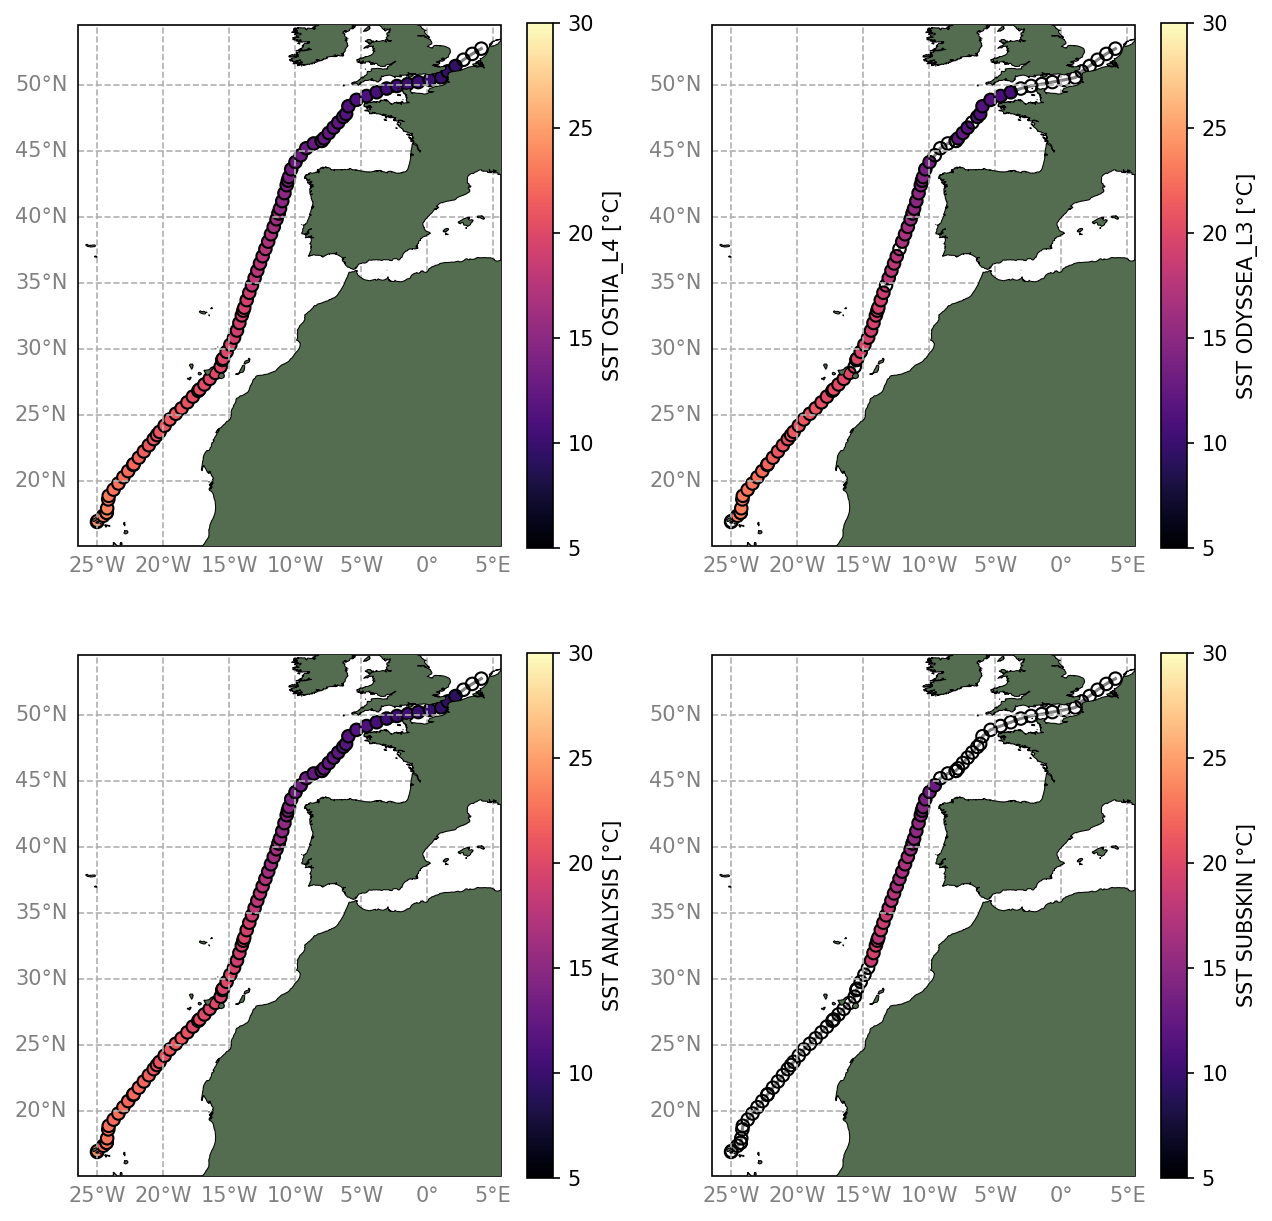

In [17]:
# set up our figure
fig, axs = plt.subplots(2, 2, figsize=(10, 10), dpi=150, subplot_kw={"projection": cartopy.crs.PlateCarree()})

# plot cruise track
for m, SST, label in zip(axs.ravel(), [SST_1, SST_2, SST_3, SST_4], SST_products):
    p1, = m.plot(df["Longitude"], df["Latitude"], zorder=1, color='0.5', transform = cartopy.crs.PlateCarree())
    p3 = m.scatter(df["Longitude"], df["Latitude"], c=SST, zorder=2, transform = cartopy.crs.PlateCarree(), cmap="magma", edgecolor='k', vmin=5, vmax=30)
    # plot colorbar
    plt.colorbar(p3, label=f"SST {label} [°C]")
    # add some map embellishments
    embellish_plot(m)

At this resolution, beyond the obvious missing data for some products, the general patterns in SST look roughly the same. But, lets take a closer look at the time series. In the next box we will replot the data, comparing the cruise track thermosalinograph data (black line) with the extracted SST data (red line), as well as showing the anomalies between the two (red dashed line).

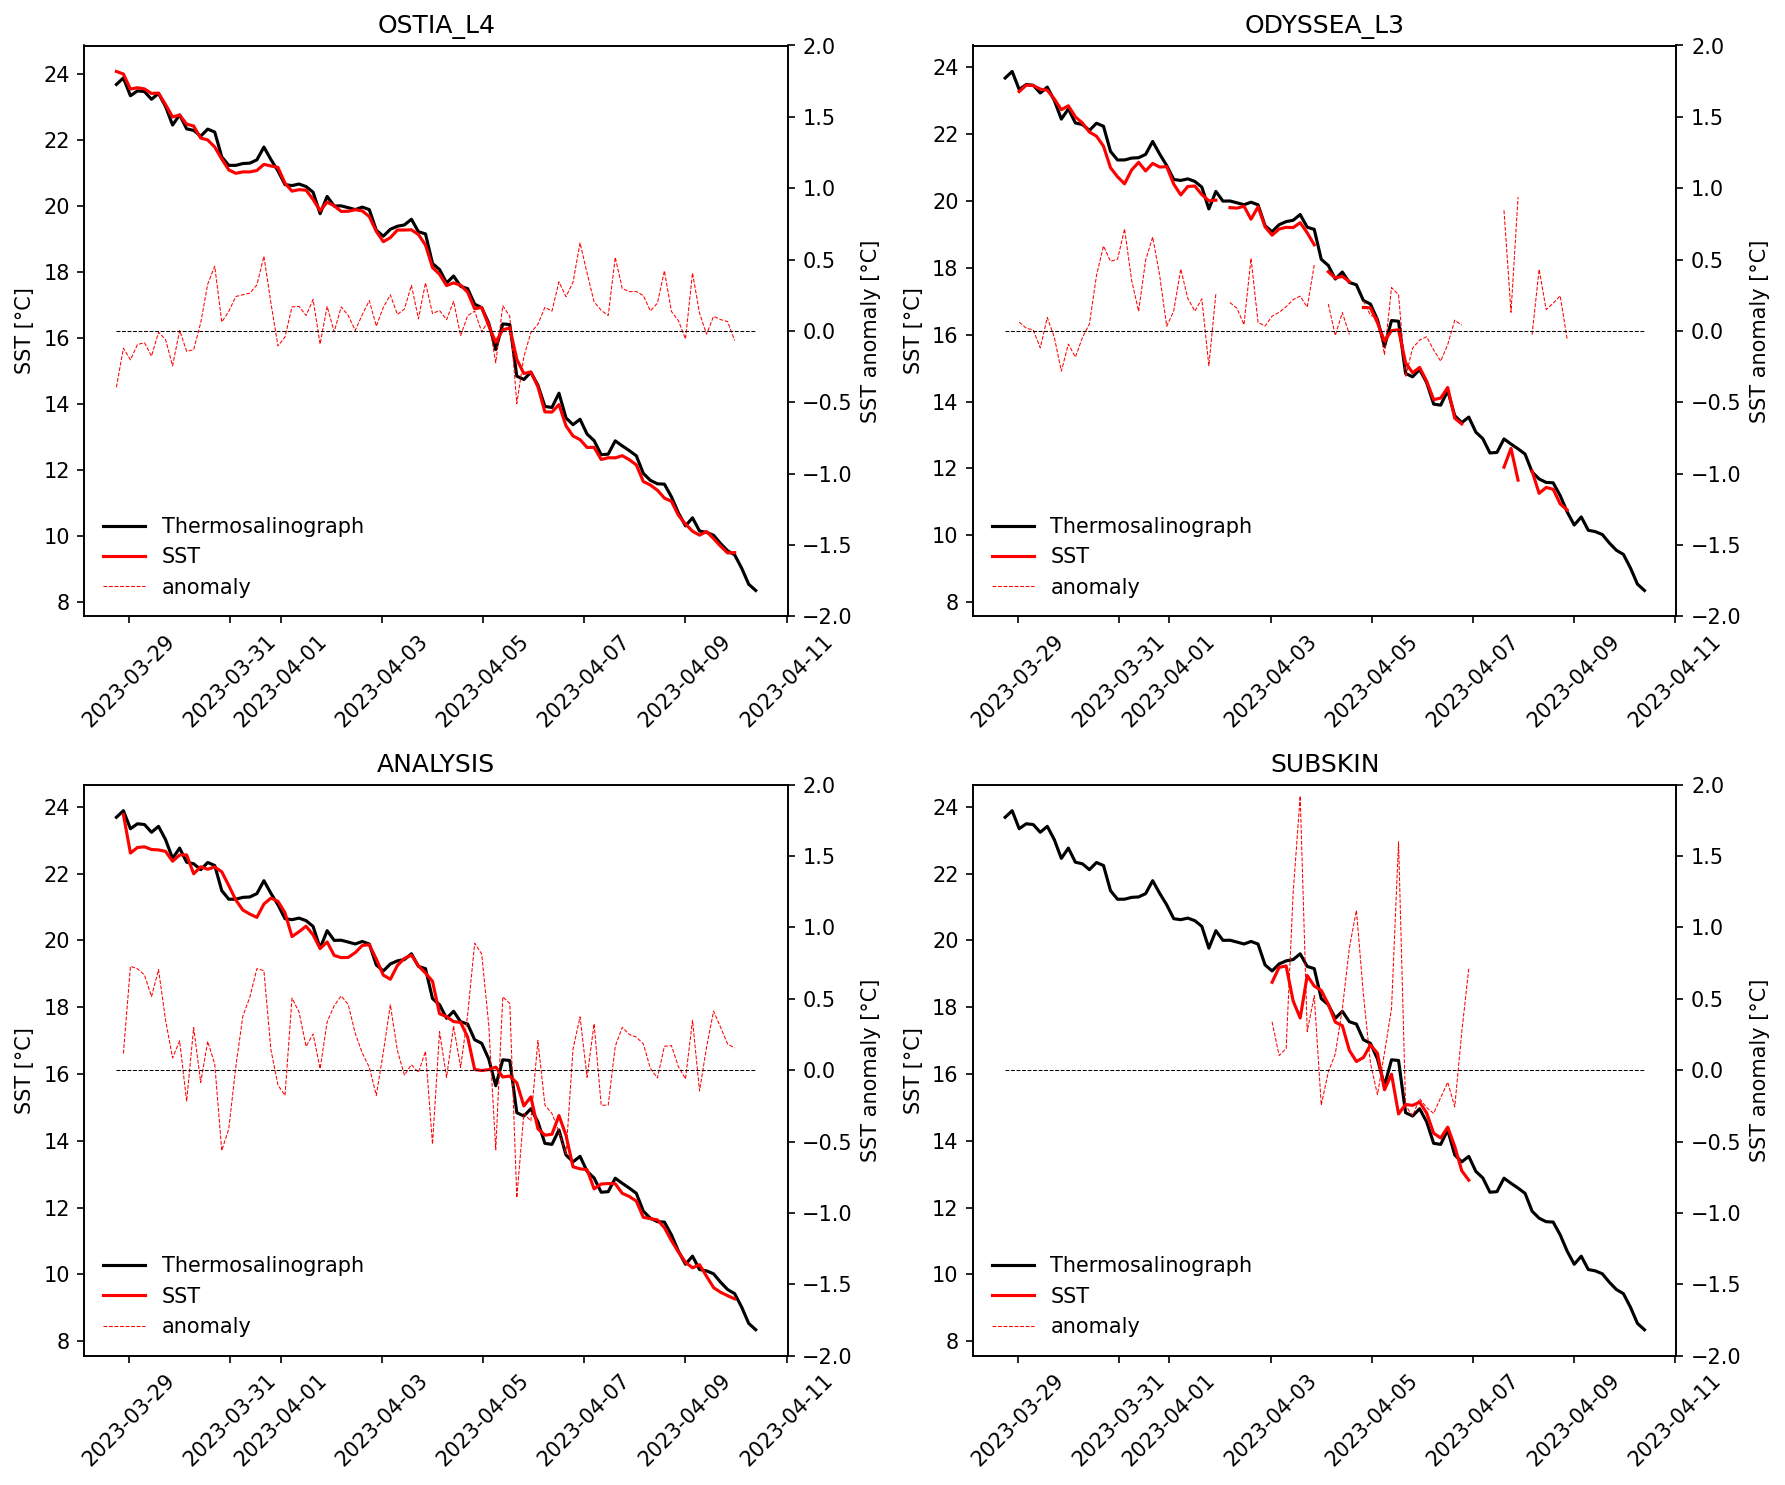

In [18]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10), dpi=150)

for ax, SST, label in zip(axs.ravel(), [SST_1, SST_2, SST_3, SST_4], SST_products):
    p1, = ax.plot(cruise_times, df["Temp [°C]"], 'k')
    p2, = ax.plot(cruise_times, SST, 'r')
    plt.sca(ax)
    plt.xticks(rotation=45)
    plt.ylabel("SST [°C]")
    
    ax2 = ax.twinx()
    p3, = ax2.plot(cruise_times, df["Temp [°C]"] - SST, 'r--', linewidth=0.5)
    ax2.plot(cruise_times, df["Temp [°C]"]*0, 'k--', linewidth=0.5)
    plt.ylabel("SST anomaly [°C]")
    plt.ylim([-2, 2])
    plt.title(label)

    plt.legend([p1, p2, p3], ['Thermosalinograph', 'SST', 'anomaly'],  loc=3, frameon=False)
    
fig.tight_layout()

Here, some of the differences become much more apparent. There is broad agreement between the OSTIA and ODYSSEA products, though we can see from the anomaly that there are some small differences, which could be attributed to differences in spatial resolution, the sensors incorporated, or the approach used to combine the data, or the spatially interpolation OSTIA uses to get to level 4. The ANALYSIS product has slightly larger anomalies than the OSTIA signal, but there does not appear to be a significant bias.

The largest anomalies occur when comparing against the SUBSKIN product. <b>It is important to note here that, while the subskin temperature is available on an hourly basis, in this case the <a href="https://data.marine.copernicus.eu/product/SST_MED_PHY_SUBSKIN_L4_NRT_010_036/description">diurnal cycle</a> has been removed</b>. However, this is entirely unsurprising given that the thermosalinography measures at 11 m, which is very likely deeper and cooler than the sub skin SST. Here we can see the clearest example of comparing two products that are not the same measurement, highlighting the care that has to be taken when considering these analyses!

<div class="alert alert-block alert-warning">

### Challenge:

In the above example, we have set our subsampling paramter to an arbitrary value to make data analysis easier. It is worth exploring the above to see what happens if you select a smaller subset, but keep the time base so that you see the hourly evolution of the SUBSKIN product and can compare that to the foundation temperature in the other products, and thermosalinograph temperatures from the cruise. You could also choose specific areas to see how more dynamical regions are captured by each product and determine how missing data effects your analysis.
<div>

<div class="alert alert-info" role="alert">

## <a id='section7'></a>Step 7: Conclusions
[Back to top](#TOC_TOP)

</div>

Choosing an SST product is not a simple task and we have seen above that differences in temporal and spatial resolution and coverage, depth, retrieval methodology and interpolation can effect the results of your analysis. Rather than choosing the easiest product to work with, the fundamental question you should be asking is "what is the correct product to address my question?". Perhaps it is a global scale, gap filled product for assessing basin scale evolution over time. Or perhaps it is a single sensor skin, or subskin product that will allow you to assess diurnal variability. In either case, you should consider the in situ instrumentation you have at your disposal when you think about how to compare these products synthetically.

For authorative information on the selection and use of SST datasets, we recommend consulting the information provided by the <a href="https://www.ghrsst.org/">Group for High Resolution SST (GHRSST)</a>. GHRSST coordinates SST providers and provides guidance for standardisation of products, and is the "go to" organisation for information on all things SST if you are considering working with these products in the future.

As you work through this notebook, feel free to contact us with any questions you may have about using the code, working with SST products and your OTC projects.

##  
<hr>
<a href="../../Index.ipynb" target="_blank"><< Index</a>
<br>
<a href="../Quality_and_cloud/Thermal_image_interpretation_SST_estimation.ipynb"><< Thermal image interpretation and estimation of sea surface temperature
</a>
<hr>
<a href="https://gitlab.eumetsat.int/eumetlab/ocean" target="_blank">View on GitLab</a> | <a href="https://training.eumetsat.int/" target="_blank">EUMETSAT Training</a> | <a href=mailto:ops@eumetsat.int target="_blank">Contact helpdesk for support </a> | <a href=mailto:training@eumetsat.int target="_blank">Contact our training team to collaborate on and reuse this material</a></span></p>